# Homework 2 - Kernel PCA

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import normalize, PCA, MDS, gaussian_kernel
from sklearn.linear_model import LogisticRegression
from scipy.spatial import distance_matrix

In [2]:
data=np.genfromtxt("data/data_kPCA.txt", delimiter=' ', dtype='float')
labels=np.genfromtxt("data/labels_kPCA.txt", dtype='int')
data=normalize(data)

In [3]:
N=10000
train_size=9000
test_size=1000

In [4]:
shuffled_indices=np.random.permutation(N)
data=data[shuffled_indices]
labels=labels[shuffled_indices]
n_labels=len(np.unique(labels))

In [5]:
train_data=data[:train_size]
train_labels=labels[:train_size]
test_data=data[-test_size:]
test_labels=labels[-test_size:]

In [6]:
#PCA
y, eigenvalues, _ =PCA(data, 2)

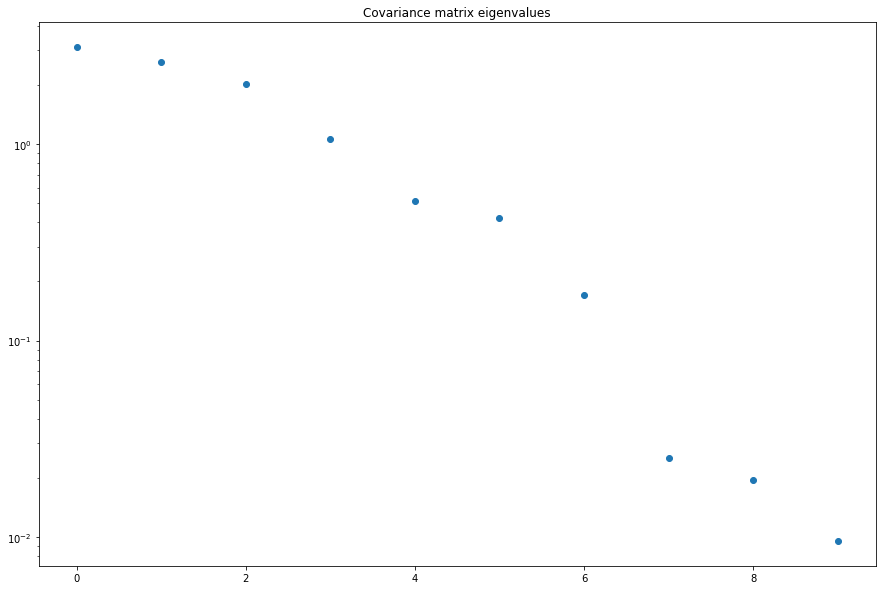

In [7]:
plt.figure(figsize=(15,10))
plt.title("Covariance matrix eigenvalues")
plt.semilogy(eigenvalues, 'o')

<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

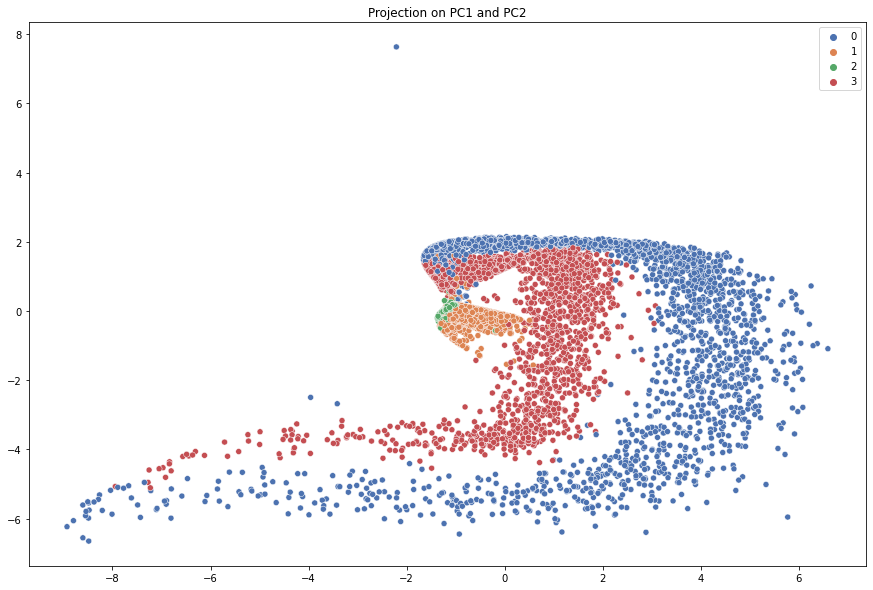

In [8]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=y[:,0], y=y[:,1], hue=labels, palette="deep")

In [9]:
_, _, A=PCA(data, 10)
px=np.array([len(test_labels[test_labels==i])/float(len(test_labels)) for i in range(n_labels)])
pxy=np.zeros((n_labels, n_labels), dtype='float')
for d in range(10):
    y=data@A[:,:d+1]
    train_y=y[:train_size]
    test_y=y[-test_size:]
    clf=LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_y, train_labels)
    predictions=clf.predict(test_y)
    py=np.array([len(predictions[predictions==i])/float(len(predictions)) for i in range(n_labels)])
    mutual_info=0
    for x in range(n_labels):
        for y in range(n_labels):
            pxy=len(np.intersect1d(np.where(test_labels==x),np.where(predictions==y)))/len(predictions)
            mutual_info+=(pxy*np.log(pxy/px[x]/py[y]) if pxy>0 else pxy)
    print("d: ", d+1, " Mutual information: ", mutual_info)

d:  1  Mutual information:  0.4960162900977527
d:  2  Mutual information:  0.5416132190514881
d:  3  Mutual information:  0.9939979330295323
d:  4  Mutual information:  1.152624083338095
d:  5  Mutual information:  1.188053011287146
d:  6  Mutual information:  1.2128585776641634
d:  7  Mutual information:  1.2207120052870377
d:  8  Mutual information:  1.2537763152490602
d:  9  Mutual information:  1.2568416447601352
d:  10  Mutual information:  1.2728727626628686


In [42]:
dist=distance_matrix(data, data, p=2)
fifth_neighbor_distance=np.sort(dist)[:,5]
width=np.mean(fifth_neighbor_distance)

In [43]:
K=np.exp(-np.square(dist)/width)

In [44]:
y, eigvals=MDS(K, 2)

In [45]:
print(len(np.where(labels==2)[0]))

2500


<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

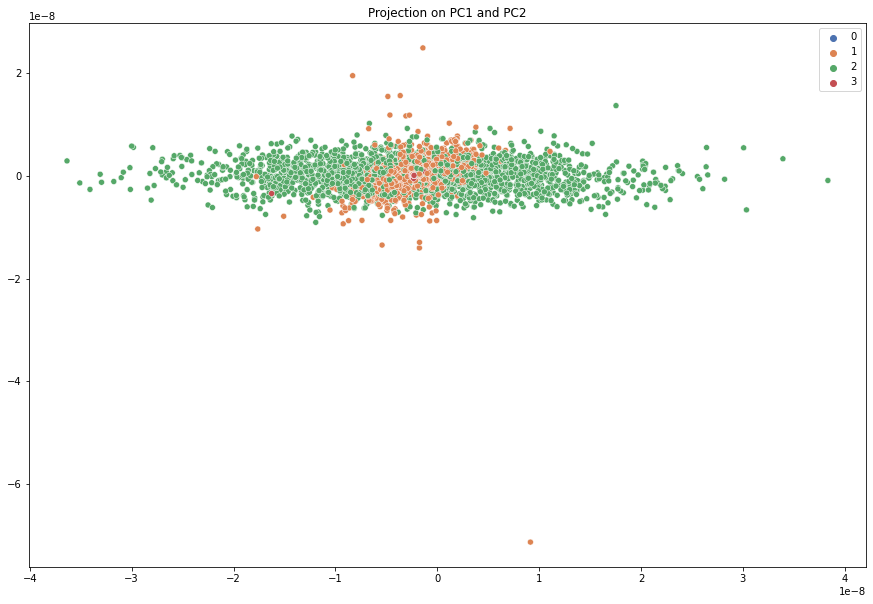

In [46]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=y[:,0], y=y[:,1], hue=labels, palette="deep")

In [41]:
Y, _=MDS(K, 10)
px=np.array([len(test_labels[test_labels==i])/float(len(test_labels)) for i in range(n_labels)])
pxy=np.zeros((n_labels, n_labels), dtype='float')
for d in range(10):
    y=Y[:,:d+1]
    train_y=y[:train_size]
    test_y=y[-test_size:]
    clf=LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_y, train_labels)

    predictions=clf.predict(test_y)
    py=np.array([len(predictions[predictions==i])/float(len(predictions)) for i in range(n_labels)])
    mutual_info=0
    for x in range(n_labels):
        for y in range(n_labels):
            pxy=len(np.intersect1d(np.where(test_labels==x),np.where(predictions==y)))/len(predictions)
            mutual_info+=(pxy*np.log(pxy/px[x]/py[y]) if pxy>0 else pxy)
    print("d: ", d+1, " Mutual information: ", mutual_info)

d:  1  Mutual information:  0.0
d:  2  Mutual information:  0.0
d:  3  Mutual information:  0.0
d:  4  Mutual information:  0.0
d:  5  Mutual information:  0.0
d:  6  Mutual information:  0.0
d:  7  Mutual information:  0.0
d:  8  Mutual information:  0.0
d:  9  Mutual information:  0.0
d:  10  Mutual information:  0.0


In [66]:
k=5
k_nearest_neighbors=np.argsort(dist)[:,:k+1]
print(k_nearest_neighbors)
D=np.ones_like(dist)*np.inf
for i in range(len(dist)):
    D[i, k_nearest_neighbors[i]]=dist[i, k_nearest_neighbors[i]]
    D[k_nearest_neighbors[i], i]=dist[i, k_nearest_neighbors[i]]
    

[[   0 3927 2369 5166 8801 3753]
 [   1 6191 7771 3685 5862 4269]
 [   2  416  262 5106 2497 4065]
 ...
 [9997 2777  236 6133 6061 5036]
 [9998 2934 5565 9234 8947 6583]
 [9999 9617 6860 7286 6821 6869]]


In [67]:
for h in range(len(D)):
    print(h, end='\r')
    for i in range(len(D)):
        for j in range(len(D)):
            if (D[i,j] > D[i,h] + D[h,j]):
                D[i,j] = D[i,h] + D[h,j]

KeyboardInterrupt: 